# VORES TITEL

**Motivation for our model project**

In our model project we will begin with describing and solving the basic solow model. 

Imports and set magics:

In [1]:
## Importing necessary libraries

import numpy as np
import sympy as sm
from scipy import optimize
from sympy import Symbol
from sympy.solvers import solve
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets

## For better looking output
sm.init_printing(use_unicode=True)

## Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

## Importing local modules
import modelproject

# The basic Solow model

$$
\begin{align}
Y_t=BK_t^{\alpha}L_t^{1-\alpha} \tag{1} \\
r_t=\alpha B\left(\frac{K_t}{L_t}\right)^{\alpha-1} \tag{2} \\
w_t=(1-\alpha) B\left(\frac{K_t}{L_t}\right)^{\alpha} \tag{3} \\
S_t=sY_t \tag{4} \\
K_{t+1}-K_t=S_t-\delta K_t \tag{5} \\
L_{t+1}=(1+n)L_t \tag{6} \\
\end{align}
$$

Where we use the per. capita notation, $y_t=\frac{Y_t}{L_t}$ and $k_t=\frac{K_t}{L_t}$

## Analytical Solution

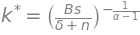

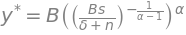

In [7]:
import sympy as sm

sm.init_printing()

# Define symbols
n, s, B, k, kstar, ystar, alpha, delta = sm.symbols('n s B k k^* y^* alpha delta')

# Solow Equation for k
Solow_eq = sm.Eq(((s * B * k**alpha - (n + delta) * k) / (1 + n)), 0)

# Solving to get the steady state equations for k and y
k_ss = sm.solve(Solow_eq, k)[0]
k_ss_factored = sm.factor(k_ss, B)

steady_state_k = sm.Eq(kstar, k_ss)

# Calculate steady-state value of y
y = B * k**alpha
y_ss = y.subs(k, k_ss)

steady_state_y = sm.Eq(ystar, y_ss)

# Print the steady-state equations for k and y
display(steady_state_k)
display(steady_state_y)

So we see that the steady state value for capital per worker, $k^*$ and $y^*$, written more elegantly, is given as:

$k^*=B^{\frac{1}{1-\alpha}}\left(\frac{s}{n+\delta}\right)^{\frac{1}{1-\alpha}}$

$y^*=B^{\frac{1}{1-\alpha}}\left(\frac{s}{n+\delta}\right)^{\frac{\alpha}{1-\alpha}}$



In [8]:
# Convert the symbolic steady-state k solution into a Python function
k_ss_function = sm.lambdify((alpha, delta, B, n, s), k_ss)

Now, k_ss_function can be called with specific values for alpha, delta, B, n, and s.

We now move into defining reasonable parameters in our model, and printing the related values of $k^*$ and $y^*$

In [9]:
# Define model parameters using plausible empirical values
alpha = 1/3
n = 0.02
s = 0.35
B = 1
delta = 0.05

In [10]:
# Compute the steady-state value for k using the parameter values
k_ss_value = k_ss_function(alpha, delta, B, n, s)

# Create and display the equation for the steady-state k with the computed value
steady_state_k_value = sm.Eq(kstar, k_ss_value)
sm.pprint(steady_state_k_value)

k__* = 11.1803398874989


In [11]:
# Compute the steady-state value for y using the steady-state k value
y_ss_value = B * k_ss_value**alpha

# Create the equation for the steady-state y with the computed value
steady_state_y_equation = sm.Eq(ystar, y_ss_value)
sm.pprint(steady_state_y_equation)

y__* = 2.23606797749979


## Numerical Solution

In [13]:
def solow_steady_state_k(n: float, s: float, B: float, alpha: float, delta: float) -> float:
    """
    Args :
    alpha: Output elasticity wrt capital
    delta: Physical capital depreciation rate
    s    : savings rate
    n    : Population growth
    B    : Productivity parameter
    """
    solow_equation = lambda k: s * B * k**alpha - (n + delta) * k
    
    return optimize.bisect(solow_equation, 1, 100, full_output=False)

k_star = solow_steady_state_k(n, s, B, alpha, delta)
print(f'k* = {k_star:.3f}')

k* = 11.180


The solution is equal to the analytical solution, which implies that the $k^*$ and $y^*$ have the same computed values.

We are now going to graphical visualize the solow diagram.

In [27]:
def plot_solow_diagram(k: int, n: float, s: float, B: int, alpha: float, delta: float, time: int):
    k_growth = [s * B * t**alpha for t in range(time + 1)]
    diagonal = [(n + delta) * t for t in range(time + 1)]

    plt.rcParams['axes.facecolor'] = 'white'
    plt.figure(figsize=(8, 6))
    plt.plot(k_growth, label=r'$sBk_t^{\alpha}$', color='tab:orange')
    plt.plot(diagonal, label=r'$(n+\delta)k_t$', color='tab:blue')
    plt.xlim(0, time)
    plt.ylim(0, diagonal[-1])
    plt.xlabel('Capital per capita, $k_t$')
    plt.ylabel('Capital per capita, $y_t$')
    plt.legend()
    plt.title('Solow Diagram')
    plt.grid(True)  # add grid
    plt.show()

widgets.interact(
    plot_solow_diagram,
    k=widgets.fixed(0),
    alpha=widgets.FloatSlider(description=r'α', min=0, max=0.9, step=0.05, value=0.3, layout=widgets.Layout(width='50%')),
    delta=widgets.FloatSlider(description=r'δ', min=0, max=0.1, step=0.01, value=0.01, layout=widgets.Layout(width='50%')),
    s=widgets.FloatSlider(description='s', min=0.01, max=0.8, step=0.05, value=0.4, layout=widgets.Layout(width='50%')),
    n=widgets.FloatSlider(description='n', min=0.01, max=0.1, step=0.005, value=0.01, layout=widgets.Layout(width='50%')),
    B=widgets.fixed(1),
    time=widgets.IntSlider(description='Time', min=1, max=1000, step=10, value=100, layout=widgets.Layout(width='50%'))
)


interactive(children=(FloatSlider(value=0.01, description='n', layout=Layout(width='50%'), max=0.1, min=0.01, …

<function __main__.plot_solow_diagram(k: int, n: float, s: float, B: int, alpha: float, delta: float, time: int)>

Blalbalba om solow diagram.

Moving forward to an extended version of the basic solow, now moving into a genereal solow model with human capital.

## Solow model with human capital

\begin{align}
Y_t&=K_t^\alpha H_t^{\varphi}\left(A_t L_t\right)^{1-\alpha-\varphi}, \tag{7} \\
r_t&=\alpha\left(\frac{K_t}{A_t L_t}\right)^{\alpha-1}\left(\frac{H_t}{A_t L_t}\right)^{\varphi}, \tag{8} \\
w_t&=(1-\alpha)\left(\frac{K_t}{A_t L_t}\right)^\alpha\left(\frac{H_t}{A_t L_t}\right)^{\varphi} A_t, \tag{9} \\
K_{t+1}-K_t&=s_K Y_t-\delta K_t, \tag{10} \\
H_{t+1}-H_t&=s_H Y_t-\delta H_t, \tag{11} \\
L_{t+1}&=(1+n) L_t, \tag{12} \\
A_{t+1}&=(1+g) A_t . \tag{13}
\end{align}


Where $\tilde k = \frac{K_t}{A_tL_t}$

**Tekst om hvad der egentlig står der**

In [81]:
#We define all symbols
k = sm.symbols('k') #physical capital
ktilde = sm.symbols('ktilde') #physical capital per effective worker
htilde = sm.symbols('htilde') #human capital per effective worker
h = sm.symbols('h') #human capital
alpha = sm.symbols('alpha') #return on physical capital
phi = sm.symbols('phi') #return on human capital
delta = sm.symbols('delta') #depreciation rate on capital
sh = sm.symbols('sh') #savings/investment rate in human capital
sk = sm.symbols('sk') #savings/investment rate in physical capital
g = sm.symbols('g') #growth in technology
n = sm.symbols('n') #growth in labour force

In [85]:
#The we define the steady state equations
ktilde, htilde, sk, sh, alpha, phi, n, g, delta = sm.symbols('ktilde htilde sk sh alpha phi n g delta')

solow_ktilde = sm.Eq((sk * ktilde**alpha * htilde**phi - (n + g + delta + n * g) * ktilde) / ((1 + n) * (1 + g)), 0)
solow_htilde = sm.Eq((sh * ktilde**alpha * htilde**phi - (n + g + delta + n * g) * htilde) / ((1 + n) * (1 + g)), 0)


In [86]:
sss = sm.solve((solow_ktilde, solow_htilde), (ktilde, htilde))
display(sss)

NotImplementedError: could not solve -ktilde*(delta + g*n + g + n) + ktilde**alpha*sk*(((delta + g*n + g + n)/(ktilde**alpha*sh))**(1/(phi - 1)))**phi

In [87]:
import numpy as np
from scipy.optimize import fsolve

# Define the Solow equations
def solow_ktilde_eq(ktilde, htilde, sk, alpha, phi, n, g, delta):
    return (sk * ktilde**alpha * htilde**phi - (n + g + delta + n * g) * ktilde) / ((1 + n) * (1 + g))

def solow_htilde_eq(ktilde, htilde, sh, alpha, phi, n, g, delta):
    return (sh * ktilde**alpha * htilde**phi - (n + g + delta + n * g) * htilde) / ((1 + n) * (1 + g))

In [94]:
# Parameters
params = {
    'alpha': 0.3,
    'phi': 0.7,
    'delta': 0.05,
    'sh': 0.2,
    'sk': 0.2,
    'g': 0.01,
    'n': 0.01
}


In [95]:
def solow_steady_state(params):
    # Unpack parameters
    alpha, phi, delta, sh, sk, g, n = params.values()

    # Define the system of equations
    def equations(variables):
        ktilde, htilde = variables
        return (
            solow_ktilde_eq(ktilde, htilde, sk, alpha, phi, n, g, delta),
            solow_htilde_eq(ktilde, htilde, sh, alpha, phi, n, g, delta)
        )

    # Initial guess for the solver
    initial_guess = (1, 1)

    # Solve the system of equations
    ktilde_ss, htilde_ss = fsolve(equations, initial_guess)

    return ktilde_ss, htilde_ss

In [96]:
ktilde_ss, htilde_ss = solow_steady_state(params)
print(f'Steady state ktilde: {ktilde_ss}')
print(f'Steady state htilde: {htilde_ss}')

Steady state ktilde: 1.0
Steady state htilde: 1.0


C:\Users\user\AppData\Local\Temp\ipykernel_20984\2192290174.py:6: RuntimeWarning: invalid value encountered in double_scalars
  return (sk * ktilde**alpha * htilde**phi - (n + g + delta + n * g) * ktilde) / ((1 + n) * (1 + g))
C:\Users\user\AppData\Local\Temp\ipykernel_20984\2192290174.py:9: RuntimeWarning: invalid value encountered in double_scalars
  return (sh * ktilde**alpha * htilde**phi - (n + g + delta + n * g) * htilde) / ((1 + n) * (1 + g))
